# Imports

In [9]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [10]:
n = 6
label_name = "stat7"
layers = [6]
epochs = 3000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [11]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [12]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 16.46957552433014
Epoch 1, Loss 16.337190628051758
Epoch 2, Loss 16.214171171188354
Epoch 3, Loss 16.123550415039062
Epoch 4, Loss 15.991869330406189
Epoch 5, Loss 15.871241211891174
Epoch 6, Loss 15.791707873344421
Epoch 7, Loss 15.62045431137085
Epoch 8, Loss 15.488516569137573
Epoch 9, Loss 15.406911134719849
Epoch 10, Loss 15.305160164833069
Epoch 11, Loss 15.268773436546326
Epoch 12, Loss 15.13587236404419
Epoch 13, Loss 15.033173203468323
Epoch 14, Loss 14.924671173095703
Epoch 15, Loss 14.859699130058289
Epoch 16, Loss 14.741459012031555
Epoch 17, Loss 14.623059034347534
Epoch 18, Loss 14.572668671607971
Epoch 19, Loss 14.455968022346497
Epoch 20, Loss 14.377764701843262
Epoch 21, Loss 14.306968450546265
Epoch 22, Loss 14.232081651687622
Epoch 23, Loss 14.210091233253479
Epoch 24, Loss 14.073986172676086
Epoch 25, Loss 13.976954698562622
Epoch 26, Loss 13.931618571281433
Epoch 27, Loss 13.871918559074402
Epoch 28, Loss 13.850847244262695
Epoch 29, Loss 13.691329956

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

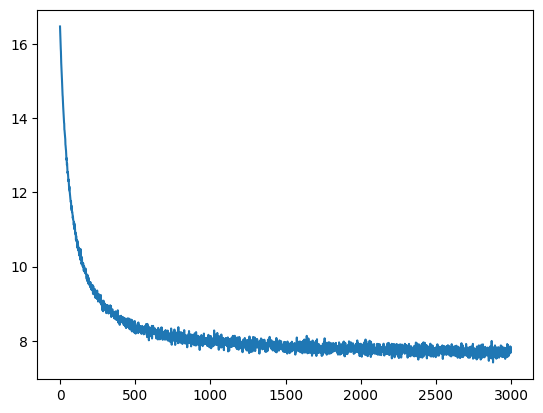

In [13]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

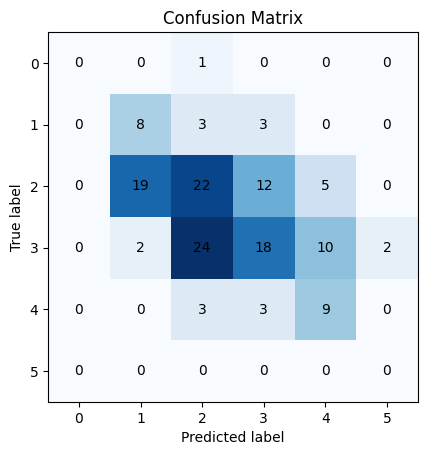

Accuracy for class 0 = 0.0%
Accuracy for class 1 = 57.142857142857146%
Accuracy for class 2 = 37.93103448275862%
Accuracy for class 3 = 32.142857142857146%
Accuracy for class 4 = 60.0%


ZeroDivisionError: division by zero

In [14]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

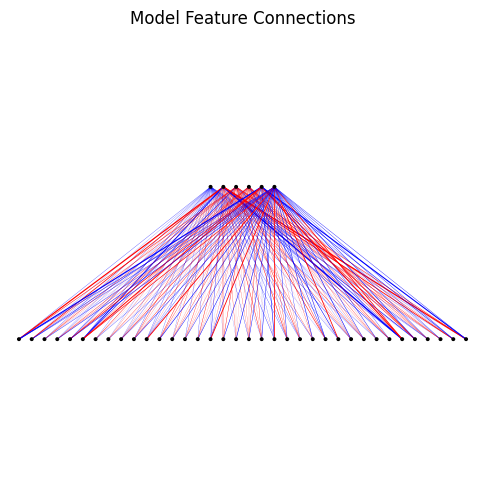

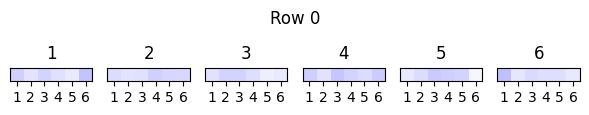

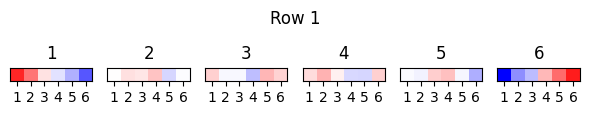

In [15]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)